In [33]:
import pandas as pd
import cv2
import pytesseract
from pytesseract import Output
from scipy.spatial import distance

## okay so we try to combine both the rotation functions and test it

# and we try it only on those images where we see that the tesseract was failing, so we will get some good estimate

# path to the bounding box file
path = "/home/priyank/DB/demo_results/ff6f9e30-89ab-44bb-906e-6b8914bb2961__32-012520100_7140191623_714-1b795a0_Commercial_Invoice-2.jpg"
csv_path = "/home/priyank/DB/demo_results/res_ff6f9e30-89ab-44bb-906e-6b8914bb2961__32-012520100_7140191623_714-1b795a0_Commercial_Invoice-2.txt"
result_path = path
df=pd.read_csv(csv_path ,header=None)
df

,0,1,2,3,4,5,6,7,8
0,1245,2090,1314,2090,1314,2122,1245,2122,0.499888
1,1208,2092,1250,2092,1250,2122,1208,2122,0.560552
2,1160,2092,1206,2092,1206,2119,1160,2119,0.634082
3,1062,2092,1148,2092,1148,2117,1062,2117,0.623024
4,1016,2092,1060,2092,1060,2119,1016,2119,0.617934
...,...,...,...,...,...,...,...,...,...
315,1423,164,1460,164,1460,194,1423,194,0.541388
316,446,164,476,164,476,194,446,194,0.550759
317,1083,119,1326,119,1326,167,1083,167,0.691600
318,1370,112,1504,112,1504,169,1370,169,0.650082


In [13]:
## distance between x0,y0 and x1,y1
df["dist_0_to_1"]=df.apply(lambda s : distance.euclidean( (s[0],s[1]),(s[2],s[3]) ) , axis=1)
avg_0_to_1 = sum(df["dist_0_to_1"])/len(df["dist_0_to_1"])

df["dist_0_to_3"]=df.apply(lambda s : distance.euclidean( (s[0],s[1]),(s[6],s[7]) ) , axis=1)
avg_0_to_3 = sum(df["dist_0_to_3"])/len(df["dist_0_to_3"])

In [14]:
if avg_0_to_1 >= avg_0_to_3:
    # boxes are horizontally aligned, nothing to right now
    print("image already horizontal")
    pass 

else: 
    # rotate by 90 degrees
    # ROTATE_90_CLOCKWISE
    # ROTATE_180
    # ROTATE_90_COUNTERCLOCKWISE
    print("rotating the image by 90 degrees to make it horizontal")
    image = cv2.imread(path)
    image = cv2.rotate(image, cv2.cv2.ROTATE_90_CLOCKWISE)
    # filename="/home/priyank/DB/rotation_test_images/rotated_Southern_Life_in_Southern_Literature_text_page_322.jpg"
    # cv2.imwrite(filename, image)


    result = pytesseract.image_to_osd(image, output_type=Output.DICT)
    if result['rotate'] == 180  :
        print('from tesseract : images is at 180 ')
        image = cv2.rotate(image, cv2.ROTATE_180)
    elif result['rotate'] == 0 :
        print('from tesseract : image is at 0 degrees now')
    cv2.imwrite(result_path, image)



rotating the image by 90 degrees to make it horizontal
image is at 0 degrees now


the above code is bit difficult to test as we will have to test it manually

In [15]:
df.iloc[0]

0              1964.000000
1              3419.000000
2              2037.000000
3              3423.000000
4              2023.000000
5              3717.000000
6              1950.000000
7              3714.000000
8                 0.448869
dist_0_to_1      73.109507
dist_0_to_3     295.332017
Name: 0, dtype: float64

In [7]:
# i=0
# xmin=min(  df.iloc[i][0], df.iloc[i][2] , df.iloc[i][4], df.iloc[i][6]  )
# ymin=min(  df.iloc[i][1], df.iloc[i][3] , df.iloc[i][5], df.iloc[i][7]  )
# xmax=max(  df.iloc[i][0], df.iloc[i][2] , df.iloc[i][4], df.iloc[i][6]  )
# ymax=max(  df.iloc[i][1], df.iloc[i][3] , df.iloc[i][5], df.iloc[i][7]  )

# cropbbox = ([1], row[2], row[3], row[4])
# cropbbox = map(int, cropbbox)
# image = cv2.imread(path)

# im = image.crop((cropbbox))


NameError: name 'row' is not defined

1950.0

In [21]:
# ## sort the dataframe according to x0 and y0 
# df = df.sort_values(by=[1,0], ignore_index=True)


number of black pixels : 448
number of white pixels : 1782


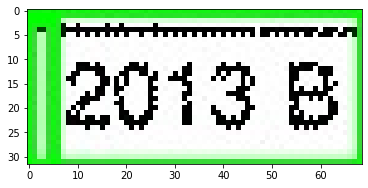

In [34]:
import pandas as pd
import numpy as np
import cv2
from matplotlib import pyplot as plt

# ## looking at how to crop the image
# i = 1
# xmin = min( df.iloc[i][0], df.iloc[i][2], df.iloc[i][4], df.iloc[i][6] )
# ymin = min ( df.iloc[i][1], df.iloc[i][3], df.iloc[i][5], df.iloc[i][7])
# xmax = max( df.iloc[i][0], df.iloc[i][2], df.iloc[i][4], df.iloc[i][6] )
# ymax = max ( df.iloc[i][1], df.iloc[i][3], df.iloc[i][5], df.iloc[i][7])

i = 0


# cropbbox = (xmin, ymin, xmax, ymax)
# cropbbox = map(int, cropbbox)
image = cv2.imread(path)
roi = image[int(df.iloc[i][1]): int (df.iloc[i][5]) , int(df.iloc[i][0]): int(df.iloc[i][4]) ]

# counting the number of pixels
number_of_white_pix = np.sum(roi == 255)
number_of_black_pix = np.sum(roi == 0)


print(f"number of black pixels : {number_of_black_pix}")
print(f"number of white pixels : {number_of_white_pix}")


%matplotlib inline
#The line above is necesary to show Matplotlib's plots inside a Jupyter Notebook
#Show the image with matplotlib
plt.imshow(roi)
plt.show()

# roi = image[0:100 , 0:100 ]
#cv2.imshow("crop-box", roi)
#roi.save('/home/priyank/DB/rotation_test_images/box1-5eedd5c0-90d1-466b-9946-f564ac461e33__ffffeb02-d712-4459-a588-90b984f98141-0-2.png')
# cv2.imwrite("/home/priyank/DB/rotation_test_images/box1-5eedd5c0-90d1-466b-9946-f564ac461e33__ffffeb02-d712-4459-a588-90b984f98141-0-2.png", roi)
# im = image.crop((cropbbox))


# for row in csv_f:
#         im = Image.open(row[0])
#         cropbbox = (xmin, ymin, xmax, ymax)
#         cropbbox = map(int, cropbbox)
#         image = cv2.imread(path)
#         im = image.crop((cropbbox))
        #im.save(output + out_image + ".png")

In [37]:
## count the number of black pixels in a loop for first and last 20 boxes to detect the top


## sort the dataframe according to x0 and y0 
df = df.sort_values(by=[1,0], ignore_index=True)



total_black_pixels_top=0
total_black_pixels_bottom=0

image = cv2.imread(path)


df_top = df[:20] 
df_bottom = df[-20:]
for index, row in df_top.iterrows():
    roi = image[int(df.iloc[i][1]): int (df.iloc[i][5]) , int(df.iloc[i][0]): int(df.iloc[i][4]) ]
    total_black_pixels_top = total_black_pixels_top + np.sum(roi == 0)
    

for index, row in df_bottom.iterrows():
    roi = image[  int(row[1]): int (row[5]) , int(row[0]): int(row[4]) ]
    total_black_pixels_bottom = total_black_pixels_bottom + np.sum(roi == 0)


if total_black_pixels_top > total_black_pixels_bottom:

    print(f"straight image : 0 degrees detected : total_black_pixels_top = {total_black_pixels_top}, total_black_pixels_bottom={total_black_pixels_bottom}")

else:
    print(f"image is upside down : total_black_pixels_top = {total_black_pixels_top}, total_black_pixels_bottom={total_black_pixels_bottom}")

straight image : 0 degrees detected : total_black_pixels_top = 318160, total_black_pixels_bottom=6826
